In [1]:
# 
import json
import cv2
import requests
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.bda.v20200324 import bda_client
from tencentcloud.bda.v20200324 import models as bda_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [19]:
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "bda.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = bda_client.BdaClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/人像分割-白色背景.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = bda_models.DetectBodyRequest()
    params = {
         "Image": str(img, encoding='utf-8'),
        "MaxBodyNum": 1,
#         "Url": "",
        "AttributesOptions": {
            "Age": True,
            "Bag": True,
            "Gender": True,
            "Orientation": True,
            "UpperBodyCloth": True,
            "LowerBodyCloth": True
        }
    }
    req.from_json_string(json.dumps(params))

    resp = client.DetectBody(req).to_json_string() 
    resp=json.loads(resp)
    print(resp)

except TencentCloudSDKException as err: 
    print(err) 

{'BodyDetectResults': [{'Confidence': 0.9916806221008301, 'BodyRect': {'X': 142, 'Y': 60, 'Width': 230, 'Height': 384}, 'BodyAttributeInfo': {'Age': {'Type': '青年', 'Probability': 0.9874466061592102}, 'Bag': {'Type': '斜挎包', 'Probability': 0.9676316976547241}, 'Gender': {'Type': '女性', 'Probability': 0.9999879598617554}, 'Orientation': {'Type': '正向', 'Probability': 0.999991774559021}, 'UpperBodyCloth': {'Texture': {'Type': '纯色', 'Probability': 0.9805546998977661}, 'Color': {'Type': '绿色系', 'Probability': 0.9484105706214905}, 'Sleeve': {'Type': '长袖', 'Probability': 0.8915559649467468}}, 'LowerBodyCloth': {'Color': {'Type': '黑色系', 'Probability': 0.8297626972198486}, 'Length': {'Type': '长', 'Probability': 0.8411285877227783}, 'Type': {'Type': '裤子', 'Probability': 0.8509673476219177}}}}], 'BodyModelVersion': '1.0', 'RequestId': '5dd5e8eb-3ac3-4dfb-8639-8ff653350580'}


In [20]:
resp['BodyDetectResults'][0]

{'Confidence': 0.9916806221008301,
 'BodyRect': {'X': 142, 'Y': 60, 'Width': 230, 'Height': 384},
 'BodyAttributeInfo': {'Age': {'Type': '青年',
   'Probability': 0.9874466061592102},
  'Bag': {'Type': '斜挎包', 'Probability': 0.9676316976547241},
  'Gender': {'Type': '女性', 'Probability': 0.9999879598617554},
  'Orientation': {'Type': '正向', 'Probability': 0.999991774559021},
  'UpperBodyCloth': {'Texture': {'Type': '纯色',
    'Probability': 0.9805546998977661},
   'Color': {'Type': '绿色系', 'Probability': 0.9484105706214905},
   'Sleeve': {'Type': '长袖', 'Probability': 0.8915559649467468}},
  'LowerBodyCloth': {'Color': {'Type': '黑色系',
    'Probability': 0.8297626972198486},
   'Length': {'Type': '长', 'Probability': 0.8411285877227783},
   'Type': {'Type': '裤子', 'Probability': 0.8509673476219177}}}}

In [21]:
Confidence=resp['BodyDetectResults'][0]["Confidence"]
print("检测出的人体置信度: ",Confidence)

检测出的人体置信度:  0.9916806221008301


In [22]:
BodyRect=resp['BodyDetectResults'][0]['BodyRect']
X=BodyRect["X"]
Y=BodyRect["Y"]
Width=BodyRect["Width"]
Height=BodyRect["Height"]

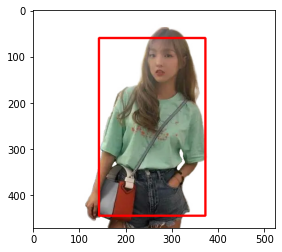

In [23]:

res=cv2.rectangle(plt.imread(img_path),(X,Y), (X+Width,Y+Height),(255,0,0), 4)
plt.imshow(res)

In [26]:
BodyAttributeInfo=resp['BodyDetectResults'][0]['BodyAttributeInfo']
BodyAttributeInfo

{'Age': {'Type': '青年', 'Probability': 0.9874466061592102},
 'Bag': {'Type': '斜挎包', 'Probability': 0.9676316976547241},
 'Gender': {'Type': '女性', 'Probability': 0.9999879598617554},
 'Orientation': {'Type': '正向', 'Probability': 0.999991774559021},
 'UpperBodyCloth': {'Texture': {'Type': '纯色',
   'Probability': 0.9805546998977661},
  'Color': {'Type': '绿色系', 'Probability': 0.9484105706214905},
  'Sleeve': {'Type': '长袖', 'Probability': 0.8915559649467468}},
 'LowerBodyCloth': {'Color': {'Type': '黑色系',
   'Probability': 0.8297626972198486},
  'Length': {'Type': '长', 'Probability': 0.8411285877227783},
  'Type': {'Type': '裤子', 'Probability': 0.8509673476219177}}}

In [35]:
Age=BodyAttributeInfo["Age"]
Bag =BodyAttributeInfo["Bag"]
Gender =BodyAttributeInfo["Gender"]
Orientation =BodyAttributeInfo["Orientation"]
UpperBodyCloth =BodyAttributeInfo["UpperBodyCloth"]
LowerBodyCloth =BodyAttributeInfo["LowerBodyCloth"]
# for key,info in BodyAttributeInfo.items():
#     print(key,info)


print(Age["Type"])
print(Bag["Type"])
print(Gender["Type"])
print(Orientation["Type"])
print(UpperBodyCloth['Color']["Type"]+UpperBodyCloth['Texture']["Type"]
      +UpperBodyCloth["Sleeve"]["Type"])
print(LowerBodyCloth['Color']["Type"]+LowerBodyCloth['Length']["Type"]
      +LowerBodyCloth["Type"]["Type"])


青年
斜挎包
女性
正向
绿色系纯色长袖
黑色系长裤子
